# Сборный проект 1

Я работаю в интернет-магазине продающем компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. В наличии данные на декабрь 2016 г. Я планирую кампанию на 2017-й. Нужно отработать принцип работы с данными и выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Общая информация

### Открыл файл с данными и изучил общую информацию

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Количество дубликатов: 0



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


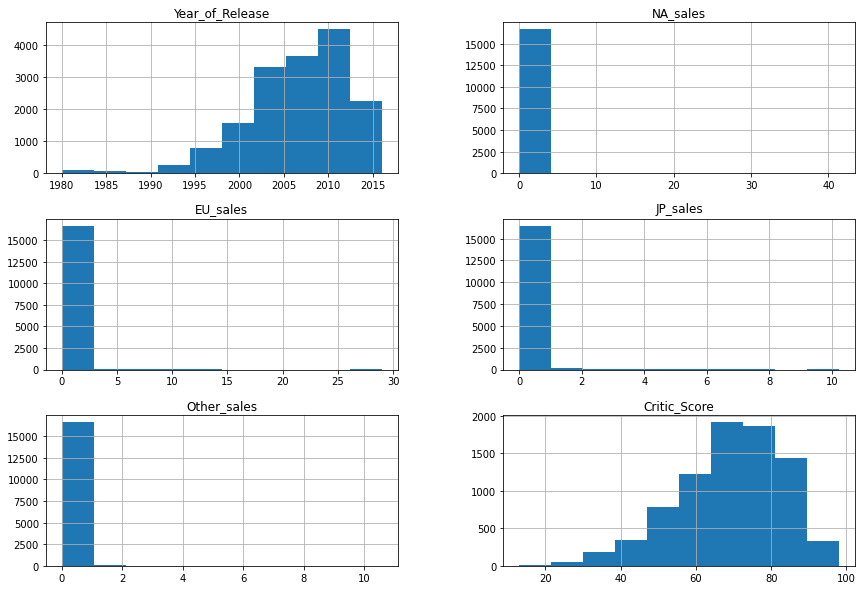

In [4]:
def inform(df):
    return df.info(), df.isna().sum(), df.hist(figsize=(14.5, 10)),\
           print('Количество дубликатов:', df.duplicated().sum(), end='\n\n'),\
           display(df.describe())
 
inform(df);

## Подготовка данных

### Заменил названия столбцов (привел к нижнему регистру)

In [5]:
df.columns = df.columns.str.lower()

### Преобразовал данные в нужные типы, заменил и удалил пропуски проверил на дубликаты

In [6]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
# Год выпуска изменил на целочисленный, т.к. год это целое число)

In [7]:
#Проверил пропуски
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
#Удалил пропуски в названии и жанре игры
df = df.dropna(subset=['name', 'genre'])

In [9]:
df['year_of_release'].isna().sum() / df['year_of_release'].count()

0.016358550231087326

In [10]:
#Удалил пропуски в годе выпуска
df = df.dropna(subset=['year_of_release'])

In [11]:
#Пропуски в оценке критиков заменил значением -1
df['critic_score'] = df['critic_score'].fillna(-1)

In [12]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Обнаружил в оценках критиков 'tbd'. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Решил заменить эти строки на "-1".

In [13]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1

In [14]:
df['user_score'] = df['user_score'].astype('float')
# Оценку пользователей изменил на вещественный

In [15]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [16]:
#Пропуски в рейтинге заменил на unknown
df['rating'] = df['rating'].fillna('unknown')

In [17]:
#Необоснованных пропусков нет
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6605
rating                0
dtype: int64

In [18]:
#Проверил неявные дубликаты
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

### Посчитал суммарные продажи во всех регионах и записал их в отдельный столбец.

In [19]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
sales = df.groupby('name')['na_sales','eu_sales','jp_sales','other_sales','total_sales'].sum()

/tmp/ipykernel_79/1846869016.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales = df.groupby('name')['na_sales','eu_sales','jp_sales','other_sales','total_sales'].sum()


In [20]:
sales.head(10)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
name,,,,,
Beyblade Burst,0.00,0.00,0.03,0.00,0.03
Fire Emblem Fates,0.81,0.23,0.52,0.11,1.67
Frozen: Olaf's Quest,0.48,0.53,0.00,0.09,1.10
Haikyu!! Cross Team Match!,0.00,0.00,0.04,0.00,0.04
Tales of Xillia 2,0.20,0.12,0.45,0.07,0.84
'98 Koshien,0.15,0.10,0.12,0.03,0.40
.hack//G.U. Vol.1//Rebirth,0.00,0.00,0.17,0.00,0.17
.hack//G.U. Vol.2//Reminisce,0.11,0.09,0.00,0.03,0.23
.hack//G.U. Vol.2//Reminisce (jp sales),0.00,0.00,0.16,0.00,0.16


## Исследовательский анализ данных

### Следующим этапом, я проверил, сколько игр выпускалось в разные годы.

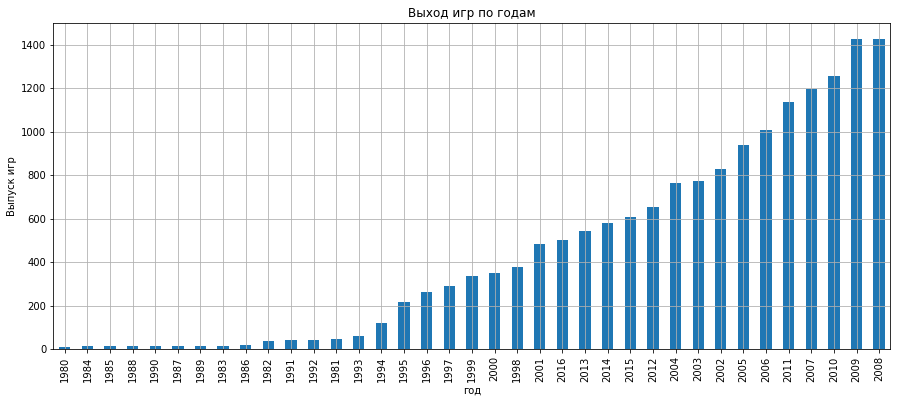

In [21]:
import matplotlib.pyplot as plt
df.groupby('year_of_release')['name'].count().sort_values(ascending=True).plot(x = 'year_of_release', y = 'name', kind = 'bar', figsize=(15,6), grid=True, title = 'Выход игр по годам')
plt.xlabel('год')
plt.ylabel('Выпуск игр')
plt.show()

In [22]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

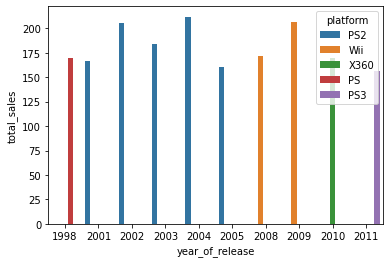

In [23]:
import seaborn as sns
years_total_sales = df.groupby(['platform','year_of_release'], as_index=False)['total_sales'].sum()
years_total_sales = years_total_sales.sort_values(by = 'total_sales', ascending=False).head(10)

sns.barplot(data=years_total_sales, x='year_of_release', y='total_sales', hue='platform')

На графике видно, как менялись продажи по платформам и платформы с наибольшими суммарными продажами. Построил распределение по годам. Если в начале периода, лидером была PS, затем рынок почти на 5 лет захватила PS2, пару лет лидировала новинка Wii, год на X360, и вновь в лидерах PS3.

### В целях прогнозирования на 2017 год, я выбрал актуальный период 2014-2016 года.

Для прогноза на 2017 год, достаточно данных за 2014-2016 гг., т.к. это период макисмально приближен к периоду прогноза, та же экономическая и политическая ситуация в мире, актуальный уровень развития технологий.

In [24]:
df_2014_2016 = df.query('2014 <= year_of_release <= 2016')

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

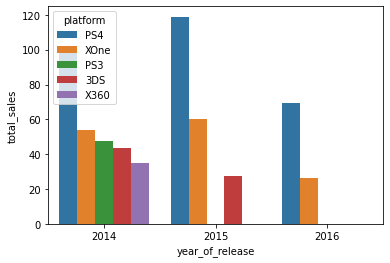

In [25]:
#Составил график за актуальный период
years_total_sales_14_16 = df_2014_2016.groupby(['platform','year_of_release'], as_index=False)['total_sales'].sum()
years_total_sales_14_16 = years_total_sales_14_16.sort_values(by = 'total_sales', ascending=False).head(10)

sns.barplot(data=years_total_sales_14_16, x='year_of_release', y='total_sales', hue='platform')

In [26]:
df_2014_2016.pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


### Построил график "ящик с усами"

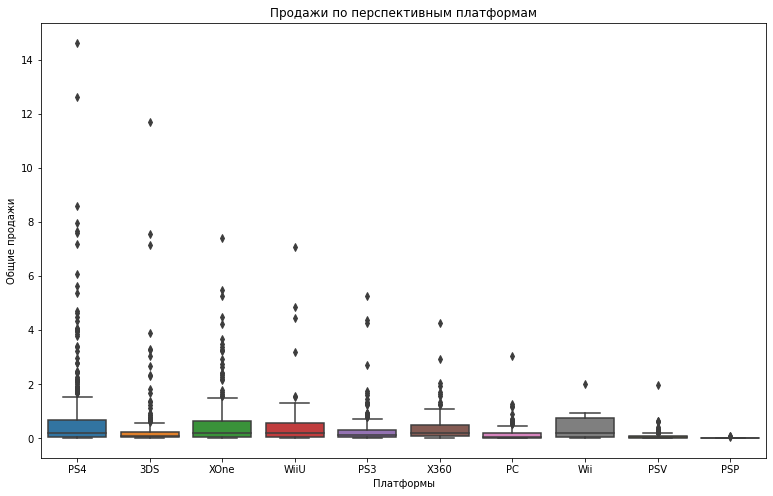

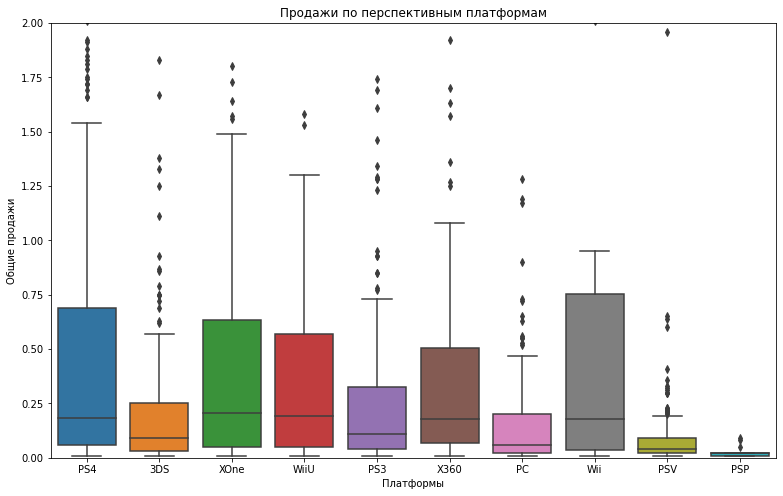

In [27]:
import seaborn as sns
data_temp, y = df_2014_2016, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

### Построил диаграмму рассеяния и посчитал корреляцию между отзывами и продажами

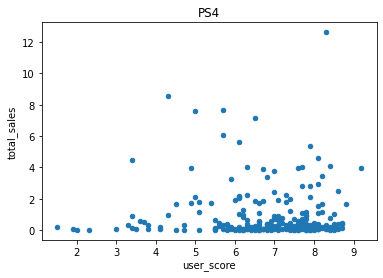

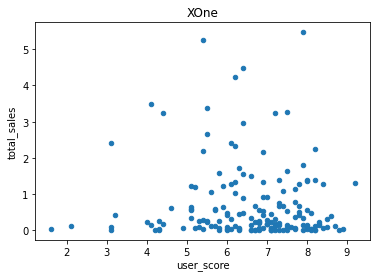

In [28]:
#Диаграмма рассеивания, показывающая отзывы пользователей и продажи по PS4 и XOne
df_2014_2016_us = df_2014_2016[df_2014_2016['user_score'] >= 0]
df_2014_2016_us[df_2014_2016_us['platform'] =='PS4'].plot(x='user_score', y='total_sales', kind='scatter', title='PS4')
df_2014_2016_us[df_2014_2016_us['platform'] =='XOne'].plot(x='user_score', y='total_sales', kind='scatter', title='XOne')
plt.show()

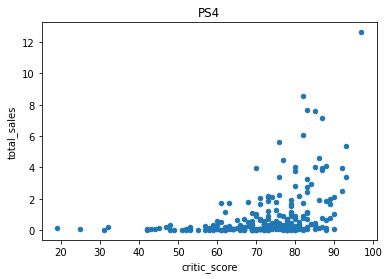

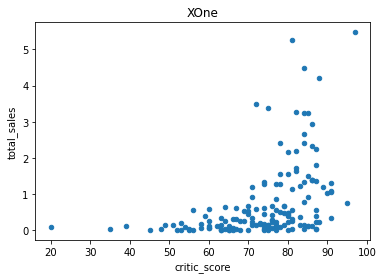

In [29]:
#Диаграмма рассеивания, показывающая отзывы критиков и продажи по PS4 и XOne
df_2014_2016_cs = df_2014_2016[df_2014_2016['critic_score'] >= 0]
df_2014_2016_cs[df_2014_2016_cs['platform'] =='PS4'].plot(x='critic_score', y='total_sales', kind='scatter', title='PS4')
df_2014_2016_cs[df_2014_2016_cs['platform'] =='XOne'].plot(x='critic_score', y='total_sales', kind='scatter', title='XOne')
plt.show()

In [30]:
df_2014_2016_us[df_2014_2016_us['platform'] =='PS4'][['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.040132
total_sales,-0.040132,1.000000


In [31]:
df_2014_2016_us[df_2014_2016_us['platform'] =='XOne'][['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.070384
total_sales,-0.070384,1.000000


In [32]:
df_2014_2016_cs[df_2014_2016_cs['platform'] =='PS4'][['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.402661
total_sales,0.402661,1.000000


In [33]:
df_2014_2016_cs[df_2014_2016_cs['platform'] =='XOne'][['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.428677
total_sales,0.428677,1.000000


Связь между отзывами пользователей и продажами слабо отрицательная -0,04 по играм на PS4 и - 0,07 по играм на XOne, связь между отзывами критиков и продажами средняя положительная (0,4 PS4 и 0,42 XOne). Принимая во внимание приведенные диаграммы и уровни корреляции, можно сказать, что отзывы пользовтелей очень слабо и обратно влияют на продажи, т.е. игры, которые ругают пользователи неплохо продаются. Отзывы же критиков прямо влияют на продажи.

Далее исследуем успешность игры в зависимоти от жанра. Рейтинг медианных продаж:

In [34]:
df_2014_2016.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

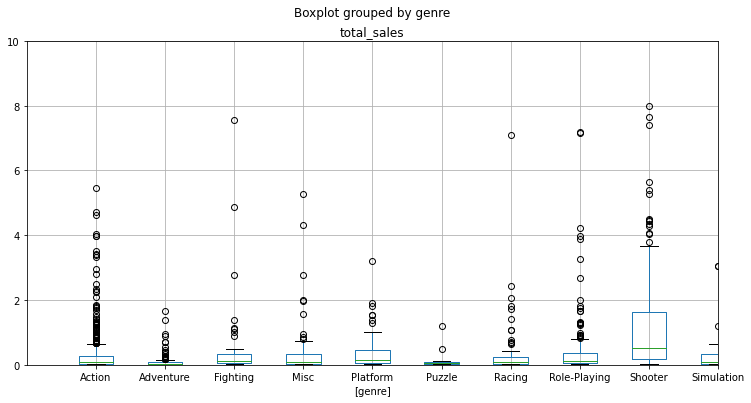

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

In [35]:
df_2014_2016.boxplot(column=['total_sales'], by=['genre'], figsize=(12, 6))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()
df_2014_2016['total_sales'].describe()

Самый прибыльный жанр в мире - шутер, далее спортивные симуляторы, смешанный жанр и РПГ.

## Портрет пользователя каждого региона

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64


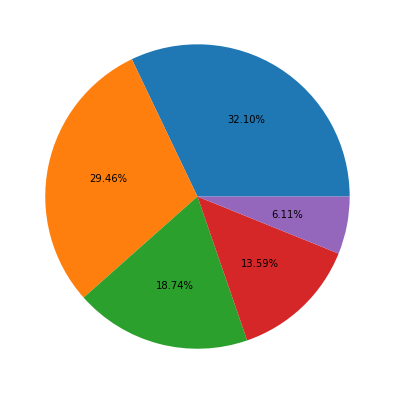

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64


In [36]:
top5_na = df_2014_2016.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print(top5_na)

genre_na = df_2014_2016.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
fig = plt.figure(figsize =(10, 7))
plt.pie(genre_na, autopct='%1.2f%%')
plt.show()
print(genre_na)

Самая популярная платформа в Северной Америке, в исследуемом периоде - PS4, далее XOne и X360, замыкает пятерку 3DS и PS3. Самый популярный жанр в Северной Америке, в периоде - шутер, экшн, спортивные игры и симуляторы.

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64


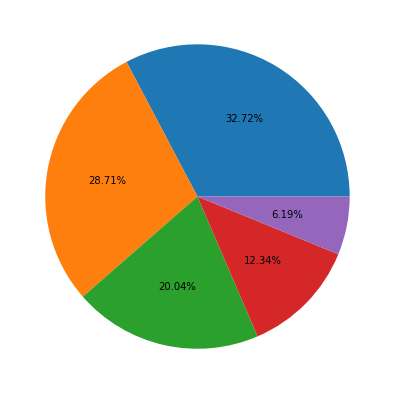

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64


In [37]:
top5_eu = df_2014_2016.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(top5_eu)

genre_eu = df_2014_2016.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
fig = plt.figure(figsize =(10, 7))
plt.pie(genre_eu, autopct='%1.2f%%')
plt.show()
print(genre_eu)

Самая популярная платформа в Европе, в исследуемом периоде - PS4 и XOne, далее PS3, замыкает пятерку PC и X360.  Самый популярный жанр в Европе, в исследуемом периоде - экшн, шутер, спортивные игры, РПГ и гонки.

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


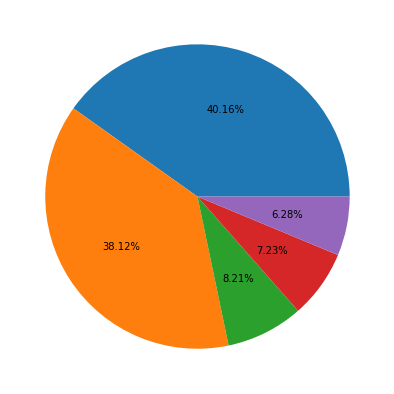

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64


In [38]:
top5_jp = df_2014_2016.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(top5_jp)

genre_jp = df_2014_2016.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
fig = plt.figure(figsize =(10, 7))
plt.pie(genre_jp, autopct='%1.2f%%')
plt.show()
print(genre_jp)

Самая популярная платформа в Японии, в исследуемом периоде - 3DS и PS4, далее WiiU, замыкает пятерку PS3 и PSV. Популярность игровых жанров подчеркивает культурные различия Востока и Запада: в лидерах RPG, затем экшн, шутер, платформеры и файтинг.

Проанализируем как влияет рейтинг от ESRB на продажи в каждом регионе

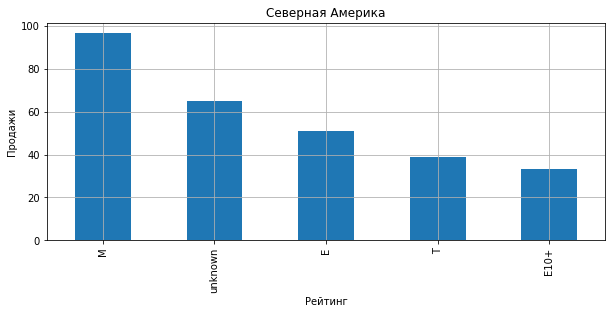

In [39]:
rating_na = df_2014_2016.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(10,4), grid=True, title = 'Северная Америка')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

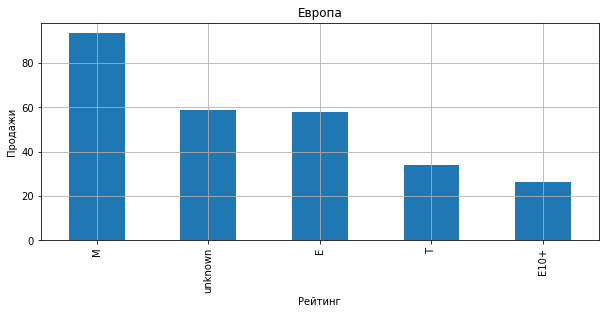

In [40]:
rating_eu = df_2014_2016.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(10,4), grid=True, title = 'Европа')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

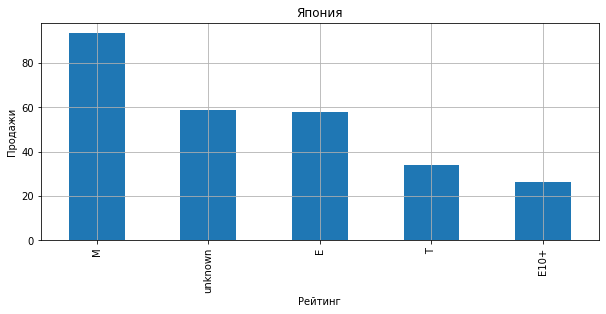

In [41]:
rating_jp = df_2014_2016.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_eu.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(10,4), grid=True, title = 'Япония')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

По всем регионам лидирует категория «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

## Проверка гипотез

### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Принимаю порог alpha = 0.05.

H_0: средний рейтинг платформы Xbox One равен среднему рейтингу платформы PC.

H_1: средний рейтинг платформы Xbox One не равен среднему рейтингу платформы PC.

In [42]:
from scipy import stats as st

In [43]:
results = st.ttest_ind(
    df_2014_2016_us[df_2014_2016_us['platform'] == 'XOne']['user_score'],
    df_2014_2016_us[df_2014_2016_us['platform'] == 'PC']['user_score'])

alpha = .05

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


### Проверка гипотезы: средние пользовательские рейтинги игр жанров Action и Sport разные. Принимаю порог alpha = 0.05.

H_0: средний рейтинг жанра Action не равен среднему рейтингу жанра Sport.

H_1: средний рейтинг жанра Action равен среднему рейтингу жанра Sport.

In [44]:
results = st.ttest_ind(
    df_2014_2016_us[df_2014_2016_us['genre'] == 'Action']['user_score'],
    df_2014_2016_us[df_2014_2016_us['genre'] == 'Sports']['user_score'])

alpha = .05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


## Общий вывод

В течение данной работы я подготовил и проаналировал данные о продажах игр, оценках пользователей и экспертов, жанрах игр и игровых платформах. По итогам работы можно сделать прогноз на 2017 год в игровой индустрии.

Был проанализирован период с 2014 по 2016 год. Самыми популярными платформами на рынке в мире являются - PS4 и Xbox One. В этот период для диагностики у нас были выбраны эти платформы: PS4 и Xbox One, которые на исследуемый момент обладали самыми большими продажами и были в тренде.

Наибольшей популярностью у пользователей всего мира пользуются шутеры и игры жанра экшн.
Безусловным лидером продаж является категория M от организации ESRB («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет).

Как показали исследования, отзывы пользователей пользователей не влияют на продажи игр, в отличие от отзывов критиков, - те имеют прямое влияние на продажи.

В конце проекта я проверил две гипотезы: "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "средние пользовательские рейтинги жанров Action и Sports разные".
Итог проверки гипотез: средние пользовательские рейтинги платформ Xbox One и PC разные, а средние пользовательские рейтинги игр жанров Action и Sport одинаковые.

Таким образом, предлагаю сделать ставку на игры на платформе PS4 и Xbox One, наиболее перспективного жанра шутер и экшн, в категории М (ESRB). Рекламные кампании направить на формирование положительных отзывов у критиков.